# Opening a dataset
An xarray dataset contains data and associated metadata, including labeled coordinates 

Based on [this](https://www.youtube.com/watch?v=zoB54IpofYA&list=PLTJsu1ustEMbVgE6SivbF17XvWmb3hqoR) tutorial on youtube.

In [1]:
import xarray

/home/kal/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
ds = xarray.open_dataset('year2010.nc')

In [3]:
# metadata is stored in ds
# *-this is a coordinate that's used in one or more variables
ds

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 77, rlon: 52, time: 365)
Coordinates:
  * time          (time) object 2010-01-01 12:00:00 ... 2010-12-31 12:00:00
    lon           (rlat, rlon) float64 ...
    lat           (rlat, rlon) float64 ...
  * rlon          (rlon) float32 27.28 27.72 28.16 28.6 ... 48.84 49.28 49.72
  * rlat          (rlat) float32 -16.72 -16.28 -15.84 ... 15.84 16.28 16.72
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) object ...
    rotated_pole  int32 ...
    pr            (time, rlat, rlon) float32 ...
Attributes:
    CDI:                            Climate Data Interface version ?? (http:/...
    history:                        Fri Dec 20 15:20:02 2019: cdo splityear p...
    institution:                    Swedish Meteorological and Hydrological I...
    Conventions:                    CF-1.4
    contact:                        rossby.cordex@smhi.se
    creation_date:                  2012-08-01-T16:04:30Z
    experiment:                     RCP4.5
    experiment_id:                  rcp45
    driving_experiment:             CCCma-CanESM2, rcp45, r1i1p1
    driving_model_id:               CCCma-CanESM2
    driving_model_ensemble_member:  r1i1p1
    driving_experiment_name:        rcp45
    frequency:                      day
    institute_id:                   SMHI
    model_id:                       SMHI-RCA4
    rcm_version_id:                 v1
    project_id:                     CORDEX
    CORDEX_domain:                  AFR-44
    product:                        output
    references:                     http://www.smhi.se/en/Research/Research-d...
    tracking_id:                    0f789894-b0bf-4e94-8fcd-44ed871a0baf
    rossby_comment:                 201108: CORDEX Africa 0.44 deg | RCA4 v1 ...
    rossby_run_id:                  201108
    rossby_grib_path:               /nobackup/rossby15/rossby/joint_exp/corde...
    CDO:                            Climate Data Operators version 1.9.3 (htt...

In [4]:
#Accessing data variables
ds.data_vars

Data variables:
    time_bnds     (time, bnds) object ...
    rotated_pole  int32 ...
    pr            (time, rlat, rlon) float32 ...

In [5]:
# Looping over data variables 
for varname in ds:
    print(varname)

time_bnds
rotated_pole
pr


In [6]:
# Accessing individual variables
ds['pr']

<xarray.DataArray 'pr' (time: 365, rlat: 77, rlon: 52)>
[1461460 values with dtype=float32]
Coordinates:
  * time     (time) object 2010-01-01 12:00:00 ... 2010-12-31 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 48.4 48.84 49.28 49.72
  * rlat     (rlat) float32 -16.72 -16.28 -15.84 -15.4 ... 15.84 16.28 16.72
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [7]:
# We can access individual data variables using this technique
ds.pr

<xarray.DataArray 'pr' (time: 365, rlat: 77, rlon: 52)>
[1461460 values with dtype=float32]
Coordinates:
  * time     (time) object 2010-01-01 12:00:00 ... 2010-12-31 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 48.4 48.84 49.28 49.72
  * rlat     (rlat) float32 -16.72 -16.28 -15.84 -15.4 ... 15.84 16.28 16.72
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

# Subsetting a dataset by time and space(Slicing and Dicing)

In [8]:
#accessing the precipitation data 
pr = ds.pr

In [9]:
# shape is time x rlat x rlon
pr.shape

(365, 77, 52)

In [10]:
# selecting the first index (time index)
# retruns a data array with rlat and rlon dimensions
pr[0, :]

<xarray.DataArray 'pr' (rlat: 77, rlon: 52)>
array([[ 6.550598,  0.453186,  0.      , ..., 18.415833,  7.45697 ,  0.916672],
       [ 4.737854,  3.676987,  3.975677, ..., 19.909286, 11.216354,  2.121735],
       [ 1.926041,  2.121735,  5.139542, ..., 12.112427, 14.357758,  0.999069],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]],
      dtype=float32)
Coordinates:
    time     object 2010-01-01 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 48.4 48.84 49.28 49.72
  * rlat     (rlat) float32 -16.72 -16.28 -15.84 -15.4 ... 15.84 16.28 16.72
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [11]:
# The above is equivalent to using isel operator (index selector)

pr.isel(time=0)

<xarray.DataArray 'pr' (rlat: 77, rlon: 52)>
array([[ 6.550598,  0.453186,  0.      , ..., 18.415833,  7.45697 ,  0.916672],
       [ 4.737854,  3.676987,  3.975677, ..., 19.909286, 11.216354,  2.121735],
       [ 1.926041,  2.121735,  5.139542, ..., 12.112427, 14.357758,  0.999069],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]],
      dtype=float32)
Coordinates:
    time     object 2010-01-01 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 48.4 48.84 49.28 49.72
  * rlat     (rlat) float32 -16.72 -16.28 -15.84 -15.4 ... 15.84 16.28 16.72
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [12]:
# .sel operator can be used to select based on values or range
# for instance to select an area that includes range of latitude 
# longitude values 
pr.sel(rlon=slice(27, 48), rlat=slice(-16, 10))

<xarray.DataArray 'pr' (time: 365, rlat: 59, rlon: 48)>
[1033680 values with dtype=float32]
Coordinates:
  * time     (time) object 2010-01-01 12:00:00 ... 2010-12-31 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 46.64 47.08 47.52 47.96
  * rlat     (rlat) float32 -15.84 -15.4 -14.96 -14.52 ... 8.36 8.8 9.24 9.68
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [13]:
# Chained operation
# select precipitation data on day 1, and within the specified rlon and rlat range

pr.isel(time=0).sel(rlon=slice(27, 48), rlat=slice(-16, 10))

<xarray.DataArray 'pr' (rlat: 59, rlon: 48)>
array([[1.926041e+00, 2.121735e+00, 5.139542e+00, ..., 1.452255e+01,
        8.229446e+00, 5.572128e+00],
       [4.171371e+00, 2.059937e+00, 5.088043e+00, ..., 1.880722e+01,
        1.261711e+01, 4.346466e+00],
       [7.601166e+00, 4.954147e+00, 5.324936e+00, ..., 2.159843e+01,
        1.523323e+01, 5.901718e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.029968e-02]], dtype=float32)
Coordinates:
    time     object 2010-01-01 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 46.64 47.08 47.52 47.96
  * rlat     (rlat) float32 -15.84 -15.4 -14.96 -14.52 ... 8.36 8.8 9.24 9.68
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [14]:
# Doing selection on time
pr.sel(time='2010-03-01T12:00:00')

<xarray.DataArray 'pr' (time: 1, rlat: 77, rlon: 52)>
array([[[ 0.597382,  0.      , ..., 16.314697, 18.663025],
        [ 1.95694 ,  2.121735, ..., 21.505737, 18.18924 ],
        ...,
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ]]], dtype=float32)
Coordinates:
  * time     (time) object 2010-03-01 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 48.4 48.84 49.28 49.72
  * rlat     (rlat) float32 -16.72 -16.28 -15.84 -15.4 ... 15.84 16.28 16.72
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [15]:
# Choosing time range from January to June
pr.sel(time=slice('2010-01', '2010-05'))

<xarray.DataArray 'pr' (time: 151, rlat: 77, rlon: 52)>
[604604 values with dtype=float32]
Coordinates:
  * time     (time) object 2010-01-01 12:00:00 ... 2010-05-31 12:00:00
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float32 27.28 27.72 28.16 28.6 ... 48.4 48.84 49.28 49.72
  * rlat     (rlat) float32 -16.72 -16.28 -15.84 -15.4 ... 15.84 16.28 16.72
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [16]:
# Selecting a value closest to an area(based on specified lon and lat)

pr.sel(rlat=15, rlon= 27, method='nearest')

# The closest location in the data was rlon = 27.28 and rlat=14.96

<xarray.DataArray 'pr' (time: 365)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) object 2010-01-01 12:00:00 ... 2010-12-31 12:00:00
    lon      float64 ...
    lat      float64 ...
    rlon     float32 27.28
    rlat     float32 14.96
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

# Plotting with xarray

In [17]:
# creating informative plots with little effort
# Use a jupyter *magic* function that causes matplotlib figures
# to be displayed within the notebook
%matplotlib inline

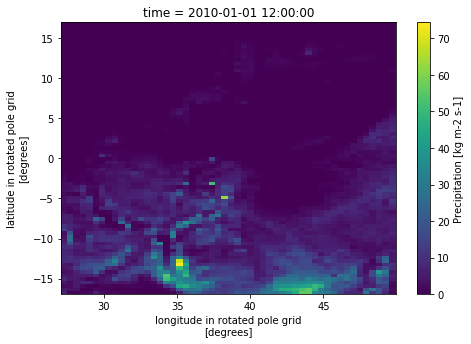

In [18]:
pr.isel(time=0).plot(size=5)

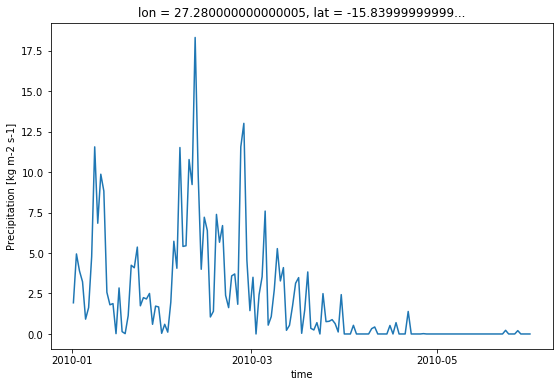

In [19]:
# this operation requires `nc-time-axis` (v1.2.0 or later) package to be installed
# use `pip3 install nc-time-axis`

pr.sel(time=slice('2010-01', '2010-05')).sel(rlat=-16, rlon=27, method='nearest').plot(size=6)

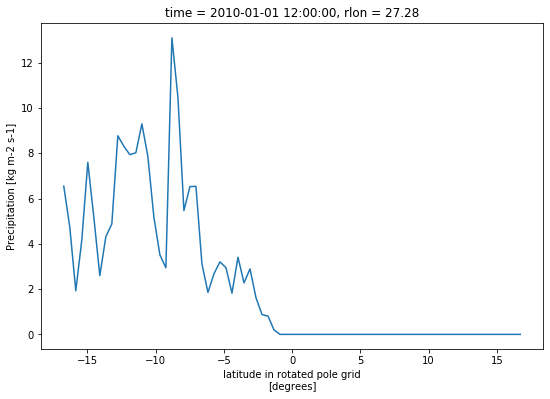

In [20]:
pr.isel(time=0).sel(rlon= 27, method='nearest').plot(size=6)

#use yincrease=False to invert the y axis

# shows the precipitation as the latitude degree increases

# Calculating matrics

In [21]:
# Calculating the mean for all location in the data 
# not that useful but ... 
pr.mean()

<xarray.DataArray 'pr' ()>
array(2.6978357, dtype=float32)

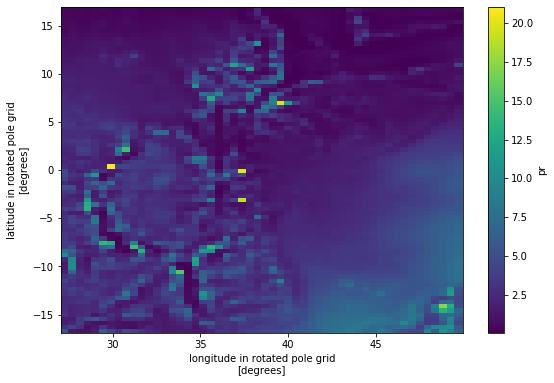

In [22]:
# Visualizing mean precipitation for each rlat and rlon location 
pr.mean(dim='time').plot(size=6)

# Additionally we can take a time slice and calculate the mean 

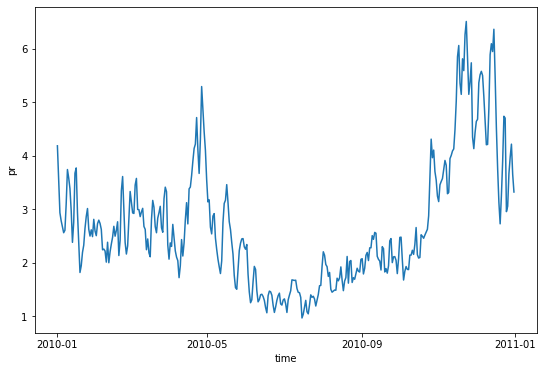

In [23]:
# mean in time
pr.mean(dim=('rlat', 'rlon')).plot(size=6)

# Grouping and resampling 

In [24]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters

<function pandas.plotting._misc.register(explicit=True)>

In [25]:
ds = xarray.open_dataset("pr_ensmean_rcp45_SMHI-RCA4_v1_day_EAfrica_mmpday.nc")

In [26]:
pr = ds.pr

In [27]:
# getting 30 years mean precipitation 
pr_30 = pr.sel(time=slice('2006-01', '2036-01')).mean(dim='time')

In [28]:
pr_anom = (pr-pr_30)

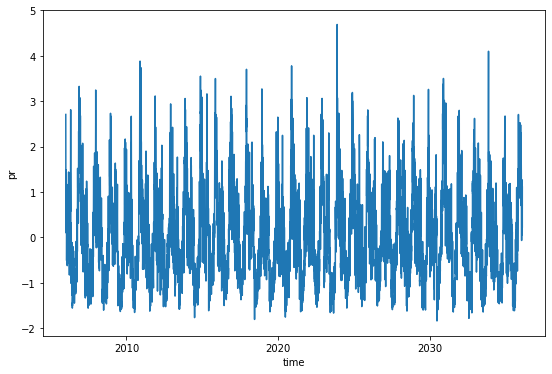

In [29]:
# Calculating anomaly? 
pr_anom.sel(time=slice('2006-01', '2036-01')).mean(dim=('rlat', 'rlon')).plot(size=6)
# it includes daily precipitation data and it's difficult to identify a trend 

In [30]:
# hence we resample by year 
# resampling by year
pr_anom_yearly = pr_anom.sel(time=slice('2006-01', None)).resample(time='Y').mean(dim='time')
pr_anom_yearly.dims, pr_anom.shape

/home/kal/.local/lib/python3.6/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)


(('time', 'rlat', 'rlon'), (34675, 77, 52))

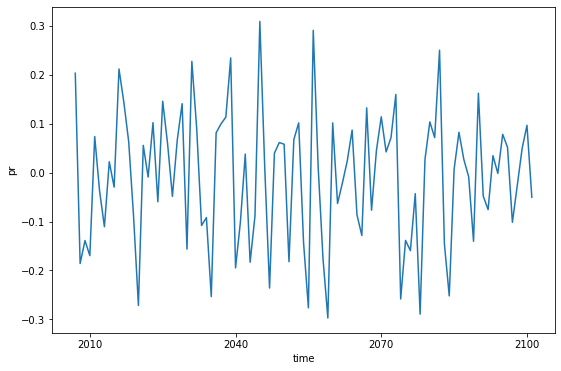

In [31]:
pr_anom_yearly.mean(dim=('rlat', 'rlon')).plot(size=6)

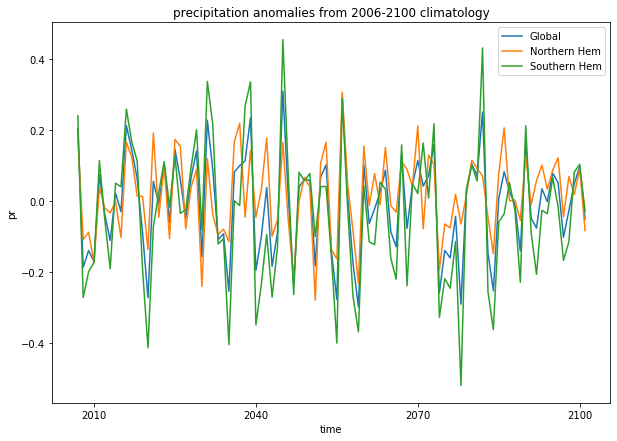

In [32]:
# Ploting multiple plots on the same axes
axes = plt.axes()
axes.figure.set_size_inches(10, 7)
pr_anom_yearly.mean(dim=('rlat', 'rlon')).plot(ax=axes, label='Global')
pr_anom_yearly.sel(rlat=slice(0, None)).mean(dim=('rlat', 'rlon')).plot(ax=axes, label='Northern Hem')
pr_anom_yearly.sel(rlat=slice(None, 0)).mean(dim=('rlat', 'rlon')).plot(ax=axes, label='Southern Hem')
plt.title('precipitation anomalies from 2006-2100 climatology')
plt.legend()

In [33]:
# creating groups by bins based on rlat
for i, d in pr_anom_yearly.groupby_bins('rlat', bins=5):
    print(i, d.dims, d.shape)

(-16.753, -10.032] ('time', 'rlat', 'rlon') (95, 16, 52)
(-10.032, -3.344] ('time', 'rlat', 'rlon') (95, 15, 52)
(-3.344, 3.344] ('time', 'rlat', 'rlon') (95, 15, 52)
(3.344, 10.032] ('time', 'rlat', 'rlon') (95, 15, 52)
(10.032, 16.72] ('time', 'rlat', 'rlon') (95, 16, 52)


/home/kal/.local/lib/python3.6/site-packages/xarray/core/common.py:736: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  "include_lowest": include_lowest,


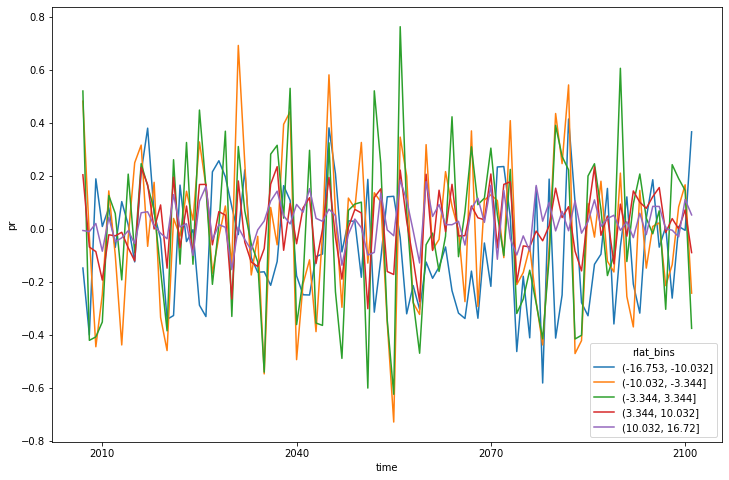

In [34]:
# ploting each 5 slices giving each differnt color and plotting them on the same graph
pr_anom_yearly.groupby_bins('rlat', bins=5).mean(dim=('rlat', 'rlon')).plot(x='time', hue='rlat_bins', size=8)

/home/kal/.local/lib/python3.6/site-packages/xarray/core/common.py:664: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


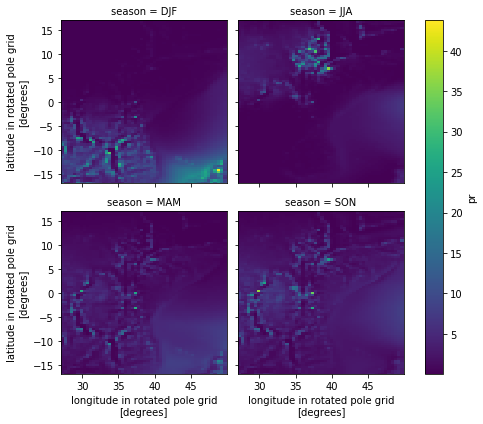

In [35]:
# Plotting seasonal mean
pr.groupby('time.season').mean(dim='time').plot(col='season', col_wrap=2)

# Masking 

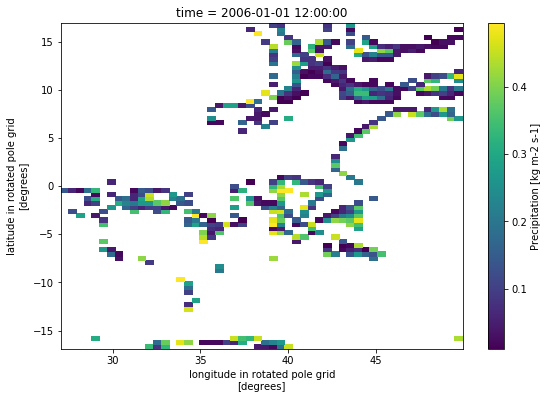

In [42]:
# xarray supports masking using the .where operator. It can be used to mask a DataArray
# by itself, by its coordinates or by another DataArray matching coordinate

pr0 = pr.isel(time=0)
# to select areas where the precipitation is between 0.2 and 0.5 on time=0(Jan 1 2006)
pr0.where(pr0 > 0.0 combine='by_coords').where(pr0 < 0.5).plot(size=6)

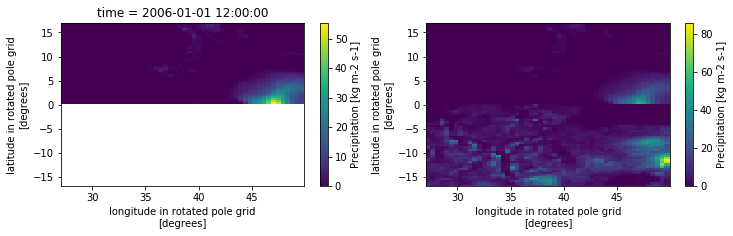

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 3))

pr0.where(pr0.rlat >  0).plot(ax=axes[0])

# combing two masked regions and plotting different time prec
pr0.where(pr0.rlat > 0, pr.isel(time=6)).plot(ax=axes[1])

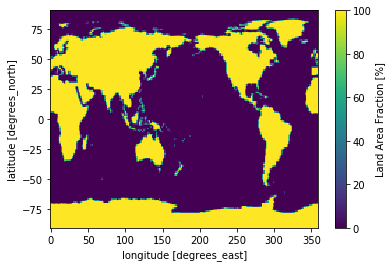

In [168]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xarray.open_dataset(url).sftlf
landfrac.plot()

## first we need to change the index coordinates to lon and lat

# Opening Multifile datasets

In [171]:
files = ['year2006.nc', 'year2007.nc', 'year2008.nc']

In [179]:
ds = xarray.open_mfdataset(files, combine='by_coords')

In [180]:
ds

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 77, rlon: 52, time: 1095)
Coordinates:
    lon           (rlat, rlon) float64 dask.array<chunksize=(77, 52), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(77, 52), meta=np.ndarray>
  * rlat          (rlat) float32 -16.72 -16.28 -15.84 ... 15.84 16.28 16.72
  * rlon          (rlon) float32 27.28 27.72 28.16 28.6 ... 48.84 49.28 49.72
  * time          (time) object 2006-01-01 12:00:00 ... 2008-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) object dask.array<chunksize=(365, 2), meta=np.ndarray>
    rotated_pole  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    pr            (time, rlat, rlon) float32 dask.array<chunksize=(365, 77, 52), meta=np.ndarray>
Attributes:
    CDI:                            Climate Data Interface version ?? (http:/...
    history:                        Fri Dec 20 15:20:02 2019: cdo splityear p...
    institution:                    Swedish Meteorological and Hydrological I...
    Conventions:                    CF-1.4
    contact:                        rossby.cordex@smhi.se
    creation_date:                  2012-08-01-T16:04:30Z
    experiment:                     RCP4.5
    experiment_id:                  rcp45
    driving_experiment:             CCCma-CanESM2, rcp45, r1i1p1
    driving_model_id:               CCCma-CanESM2
    driving_model_ensemble_member:  r1i1p1
    driving_experiment_name:        rcp45
    frequency:                      day
    institute_id:                   SMHI
    model_id:                       SMHI-RCA4
    rcm_version_id:                 v1
    project_id:                     CORDEX
    CORDEX_domain:                  AFR-44
    product:                        output
    references:                     http://www.smhi.se/en/Research/Research-d...
    tracking_id:                    0f789894-b0bf-4e94-8fcd-44ed871a0baf
    rossby_comment:                 201108: CORDEX Africa 0.44 deg | RCA4 v1 ...
    rossby_run_id:                  201108
    rossby_grib_path:               /nobackup/rossby15/rossby/joint_exp/corde...
    CDO:                            Climate Data Operators version 1.9.3 (htt...

In [176]:
ds.nbytes/1000 ** 3

0.01763276